# Frequncy distribution

In [2]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
text1 ="Native speakers of American English (Am I a Native Speaker?) who have produced documents of any kind (including college student essays, blogs, poetry, fiction, email, etc.) are invited to become a part of linguistic history by contributing these materials to the OANC/MASC. Authors can consult the frequently asked questions page to learn more about how the data will be used, and why you should consider contributing your work to the OANC."
fd = nltk.FreqDist(text1.split())
fd

FreqDist({'to': 4, 'the': 4, 'of': 3, 'Native': 2, 'a': 2, 'contributing': 2, 'speakers': 1, 'American': 1, 'English': 1, '(Am': 1, ...})

## Conditional Frequency

In [4]:
from nltk.probability import ConditionalFreqDist

In [5]:
cfd = ConditionalFreqDist((len(word), word) for word in text1.split())
cfd[4]

FreqDist({'have': 1, 'kind': 1, 'part': 1, 'page': 1, 'more': 1, 'data': 1, 'will': 1, 'your': 1, 'work': 1})

## Highest repeated words in presidential address

In [7]:
from nltk.corpus import inaugural

In [8]:
text = inaugural.words(fileids='2009-Obama.txt')
text

['My', 'fellow', 'citizens', ':', 'I', 'stand', 'here', ...]

In [10]:
fd_words = nltk.FreqDist(text)
fd_words

FreqDist({',': 130, 'the': 126, '.': 108, 'and': 105, 'of': 82, 'to': 66, 'our': 58, 'we': 50, 'that': 48, 'a': 47, ...})

## Most repeated nouns in inaugural speech

In [17]:
tagged = nltk.pos_tag(text)
fdd = nltk.FreqDist(tagged)
word = []
con = []
for val in fdd:
    if(val[1][:2] == "NN"):
        word.append(val[0])
        con.append(fdd[val])
        print(val, fdd[val])

('nation', 'NN') 12
('America', 'NNP') 10
('world', 'NN') 7
('people', 'NNS') 6
('today', 'NN') 5
('generation', 'NN') 5
('day', 'NN') 5
('time', 'NN') 5
('spirit', 'NN') 5
('God', 'NNP') 5
('words', 'NNS') 4
('peace', 'NN') 4
('crisis', 'NN') 4
('things', 'NNS') 4
('work', 'NN') 4
('men', 'NNS') 4
('women', 'NNS') 4
('s', 'NN') 4
('power', 'NN') 4
('Americans', 'NNPS') 3
('oath', 'NN') 3
('prosperity', 'NN') 3
('ideals', 'NNS') 3
('economy', 'NN') 3
('jobs', 'NNS') 3
('care', 'NN') 3
('hope', 'NN') 3
('end', 'NN') 3
('history', 'NN') 3
('freedom', 'NN') 3
('life', 'NN') 3
('government', 'NN') 3
('force', 'NN') 3
('cannot', 'NN') 3
('man', 'NN') 3
('generations', 'NNS') 3
('father', 'NN') 3
('nations', 'NNS') 3
('moment', 'NN') 3
('children', 'NNS') 3
('task', 'NN') 2
('trust', 'NN') 2
('service', 'NN') 2
('cooperation', 'NN') 2
('waters', 'NNS') 2
('storms', 'NNS') 2
('war', 'NN') 2
('part', 'NN') 2
('age', 'NN') 2
('health', 'NN') 2
('schools', 'NNS') 2
('planet', 'NN') 2
('confidenc

In [18]:
nouns = pd.DataFrame({'Nouns': word, 'count':con})
nouns.head(10)

,Nouns,count
0,nation,12
1,America,10
2,world,7
3,people,6
4,today,5
5,generation,5
6,day,5
7,time,5
8,spirit,5
9,God,5


In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nouns', ylabel='count'>

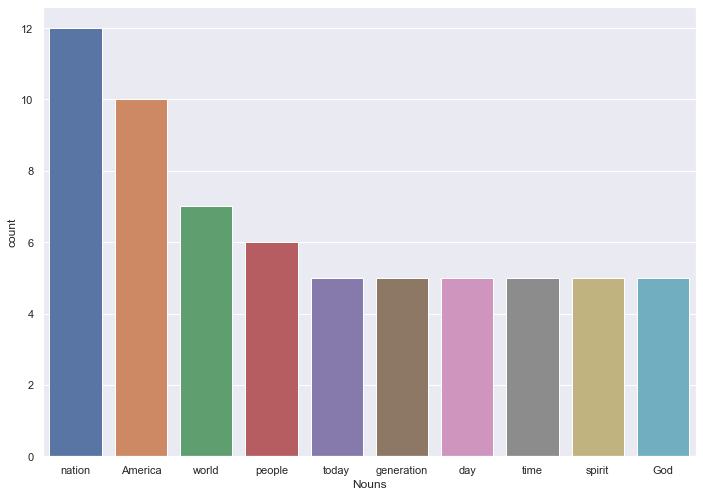

In [20]:
sns.barplot(nouns['Nouns'][:10], nouns['count'][:10])

## Chinese segmentation using jieba

In [21]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [22]:
import jieba
seg = jieba.cut("我们尝试在阅读课中引入篇章思想，既能使词汇学习生机勃勃，更重要的是还能实现对篇章主题信息的掌握和培养构造篇章的能力，达到语言学习的最终目的", cut_all = True)
print(" ".join(seg))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.620 seconds.
Prefix dict has been built successfully.


我们 尝试 在 阅读 阅读课 中 引入 篇章 思想 ， 既能 使 词汇 词汇学 学习 生机 生机勃勃 勃勃 ， 更 重要 的 是 还 能 实现 对 篇章 主题 信息 的 掌握 和 培养 构造 篇章 的 能力 ， 达到 语言 语言学 学习 的 最终 目的


## Basic Text processing Pipeline

In [23]:
import nltk
sent = "Become an expert in NLP"
words = nltk.word_tokenize(sent)
print(words)

['Become', 'an', 'expert', 'in', 'NLP']


## Sentence tokenizer

In [24]:
import nltk
texts = ["Native speakers of American English (Am I a Native Speaker?) who have produced documents of any kind (including college student essays, blogs, poetry, fiction, email, etc.) are invited to become a part of linguistic history by contributing these materials to the OANC/MASC. Authors can consult the frequently asked questions page to learn more about how the data will be used, and why you should consider contributing your work to the OANC."]
for text in texts:
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        print(words)
        tagged = nltk.pos_tag(words)
        print(tagged)        

['Native', 'speakers', 'of', 'American', 'English', '(', 'Am', 'I', 'a', 'Native', 'Speaker', '?', ')']
[('Native', 'JJ'), ('speakers', 'NNS'), ('of', 'IN'), ('American', 'JJ'), ('English', 'NNP'), ('(', '('), ('Am', 'VBP'), ('I', 'PRP'), ('a', 'DT'), ('Native', 'JJ'), ('Speaker', 'NNP'), ('?', '.'), (')', ')')]
['who', 'have', 'produced', 'documents', 'of', 'any', 'kind', '(', 'including', 'college', 'student', 'essays', ',', 'blogs', ',', 'poetry', ',', 'fiction', ',', 'email', ',', 'etc', '.', ')']
[('who', 'WP'), ('have', 'VBP'), ('produced', 'VBN'), ('documents', 'NNS'), ('of', 'IN'), ('any', 'DT'), ('kind', 'NN'), ('(', '('), ('including', 'VBG'), ('college', 'NN'), ('student', 'NN'), ('essays', 'NNS'), (',', ','), ('blogs', 'NNS'), (',', ','), ('poetry', 'NN'), (',', ','), ('fiction', 'NN'), (',', ','), ('email', 'NN'), (',', ','), ('etc', 'FW'), ('.', '.'), (')', ')')]
['are', 'invited', 'to', 'become', 'a', 'part', 'of', 'linguistic', 'history', 'by', 'contributing', 'these', 